In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
import random
random.seed(45)  

In [3]:
# Creating ID Feature with 800 samples, and then randomly shuffling the data points
n=800
id_feature=list("ID"+str(i+100) for i in range(1,n+1))
random.shuffle(id_feature)

In [4]:
# Creating Groups A, B and C and then shuffling them
groups = np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(groups)

In [5]:
# Creating Feature_1 with mean 2500 and std = 300.
mean = 2500
std = 300
feature_1 = sps.norm.rvs(mean, std, size=n)
feature_1.mean()

2489.0330037791236

In [6]:
# Creating Feature_2 which is sampled randomly from a normal distribution with mean 400 and standard deviation 15.
mean_2 = 400
std_2 = 15
feature_2 = sps.norm.rvs(mean_2, std_2, size=n)
feature_2.mean()

400.7463770842701

In [7]:
# Creating a DataFrame with the ID, Group, Feature_1, Feature_2 Columns
data = pd.DataFrame({"ID":id_feature,"Group":groups,"Feature_1":feature_1,"Feature_2":feature_2})
data['Group'].value_counts()

Group
B    267
A    267
C    266
Name: count, dtype: int64

In [8]:
# Creating Feature_3 using Group Feature_1 and Feature_2 based on the given rules.
data['Feature_3'] = np.nan
data.loc[data['Group'] == 'A', 'Feature_3'] = 3 * data['Feature_1'] - 5 * data['Feature_2']
data.loc[data['Group'] == 'B', 'Feature_3'] = 2 * data['Feature_1']
data.loc[data['Group'] == 'C', 'Feature_3'] = -data['Feature_1'] + data['Feature_2']



In [9]:
# Adding Additional Component which is sampled from a normal distribution wiht mean 0 and standard seviation 12. 
mean_3 = 0
std_3 = 12
additional_component = sps.norm.rvs(mean, std, size=n)
data['Feature_3'] += additional_component


In [10]:
# Samples greater than 3000 based on theoretical distribution
from scipy.stats import norm
mean_4 = 2500
std_dev = 300
# Z-score for 3000
z = (3000 - mean_4) / std_dev
above_3000 = 1 - norm.cdf(z)
# Estimate the number of samples greater than 3000
samples_above_3000 = round( n * above_3000)
print("Samples greater than 3000:", samples_above_3000)


Samples greater than 3000: 38


In [11]:
# Samples which are greater than 3000
sum(data['Feature_1']>3000)

36

In [12]:
# Mean and standard deviation of Feature_3 within each group
groupdata = data.groupby('Group')['Feature_3'].agg(['mean', 'std'])
print(groupdata)

              mean         std
Group                         
A      7878.264050  973.540920
B      7490.691990  660.768145
C       372.930661  432.041616


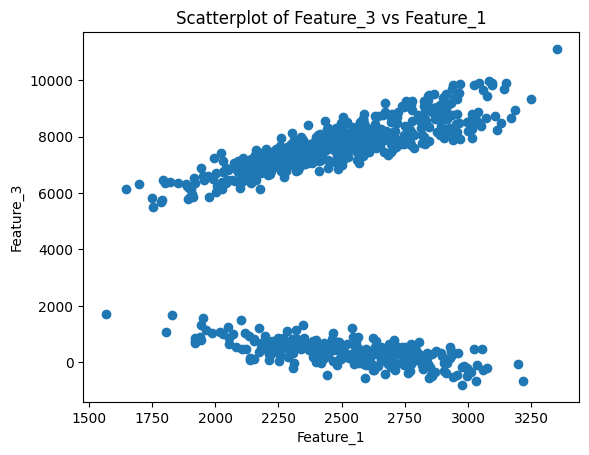

In [13]:
# Scatterplot of Feature_3 vs Feature_1
plt.scatter(data['Feature_1'], data['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

In [14]:
# Creating a csv file
data.to_csv('fake_data.csv', index=False)